In [12]:
import sys
sys.path.append("../")
from experiments import get_all_gene_experiments

SPECIES = "erato"
WING = "forewings"
COLOR = "color_3"

# Load all gene experiments
experiments = get_all_gene_experiments(SPECIES, WING, COLOR)

In [13]:
import numpy as np
from data_tools import parse_patternize_csv, load_json

# Combine genes
pca_data = parse_patternize_csv(experiments[0].pca_loading_path)
for i, experiment in enumerate(experiments):
    if i == 0:
        input_data = np.load(experiment.gene_vcf_path)['arr_0']
        metadata = load_json(experiment.metadata_path)
    else:
        input_data = np.hstack((input_data, np.load(experiment.gene_vcf_path)['arr_0']))
        new_metadata = load_json(experiment.metadata_path)
        pca_data = parse_patternize_csv(experiment.pca_loading_path)
        for j, m in enumerate(metadata):
            assert m == new_metadata[j], f"Metadata does not match: {m} != {new_metadata[j]}"

In [22]:
# Assign PCA data
train_data = []
print(f"Length of input data: {len(input_data)}")
for name, row in zip(metadata, input_data):
    if name+"_d" in pca_data:
        train_data.append([name, row, pca_data[name+"_d"]])
print(f"Length of train data: {len(train_data)}")

Length of input data: 484
Length of train data: 480


In [23]:
import random
# Split data
random.seed(2015)
random.shuffle(train_data)
train_idx = int(len(train_data) * 0.8)
val_idx = int(len(train_data) * 0.1)

train_split = train_data[:train_idx]
val_split = train_data[train_idx:train_idx+val_idx]
test_split = train_data[train_idx+val_idx:]

In [24]:
name, genome, pca = train_split[0]
print(name)
print(genome.shape)
print(pca.shape)
print(pca[:10])

CAM017167
(340202, 3)
(480,)
[-12.08018619  -9.82742593  -5.74764701  -0.08457345   4.53762103
   3.89058684  -4.77573354   9.75544261   7.30764357   7.60892696]


Num PCA dimensions: 480


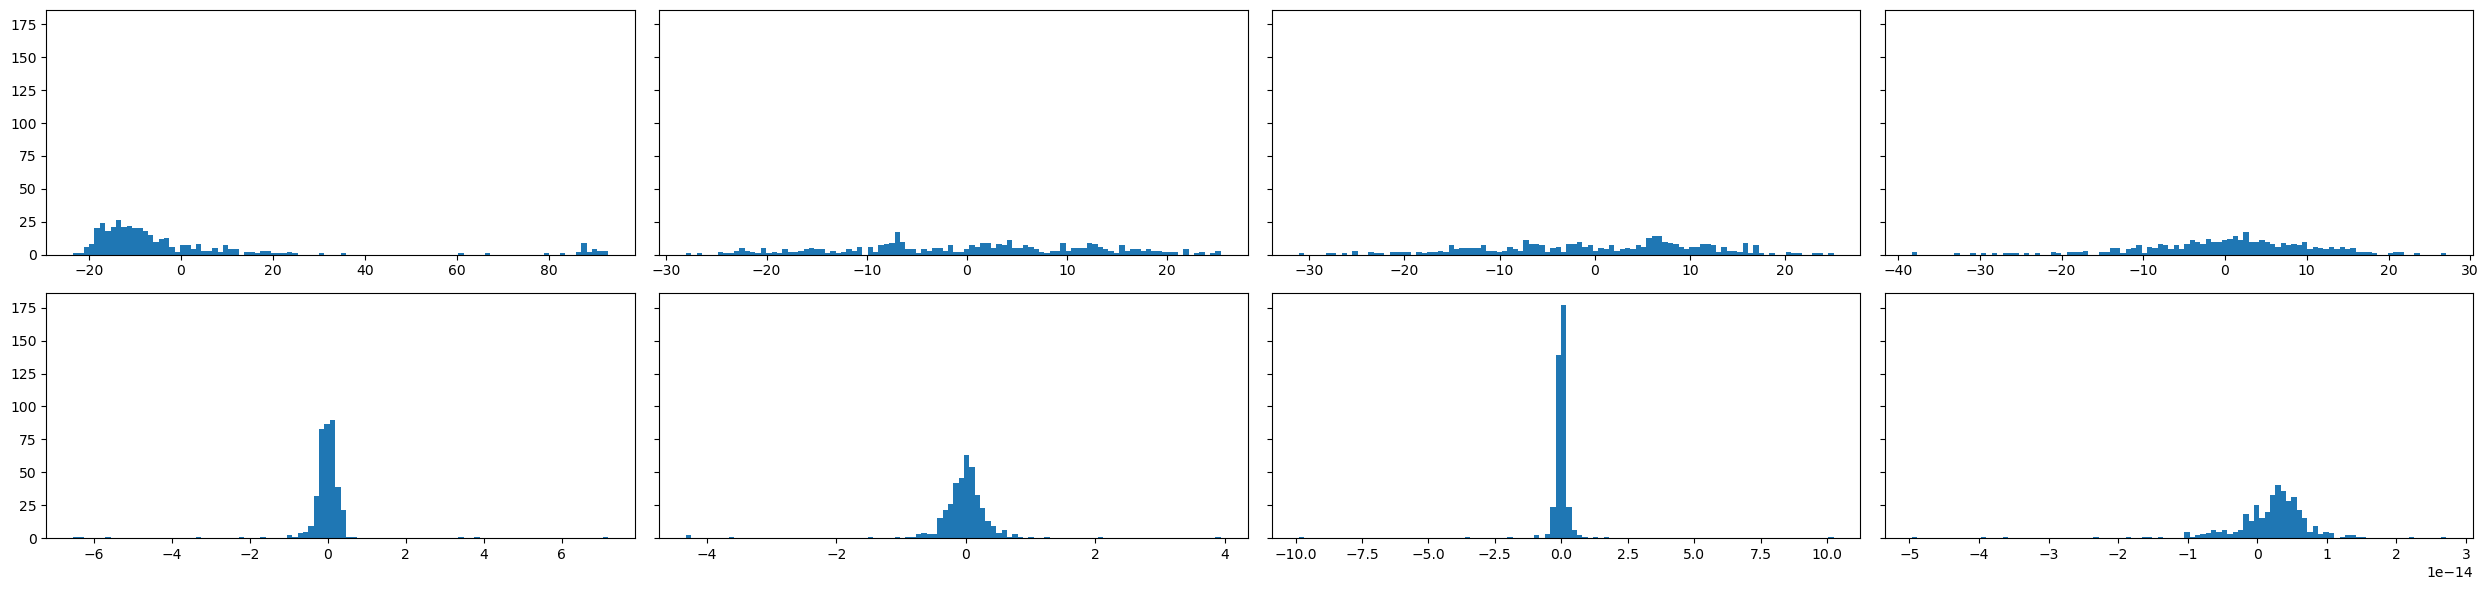

In [43]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, sharey=True, tight_layout=True, figsize=(25, 6))
pca_data = np.array([d[2] for d in train_split])
num_pca = pca_data.shape[1]
print(f"Num PCA dimensions: {num_pca}")
#print(train_split[:, 2, 0].shape)
for i in range(4):
    axs[0][i].hist(pca_data[:, i], bins=100)
for i in range(4):
    axs[1][3-i].hist(pca_data[:, -(i+1)], bins=100)
plt.show()
plt.close()

As can be seen above, the top 4 dimensions can span values between -40 to 80+

While the bottom 4 dimensions only span between -10 and 6+

This would make a ~7 root-mean-squared-error decent